In [2]:
# Import libraries
import numpy as np
import pandas as pd
from statsmodels import regression
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
import yfinance as yf

In [ ]:
def linreg(X,Y):
    # Running the linear regression
    X = sm.add_constant(X)
    model = sm.OLS(Y, X).fit()
    B0 = model.params[0]
    B1 = model.params[1]
    X = X[:, 1]

    # Return summary of the regression and plot results
    X2 = np.linspace(X.min(), X.max(), 100)
    Y_hat = X2 * B1 + B0
    plt.scatter(X, Y, alpha=1) # Plot the raw data
    plt.plot(X2, Y_hat, 'r', alpha=1);  # Add the regression line, colored in red
    plt.xlabel('X Value')
    plt.ylabel('Y Value')
    return model, B0, B1

Line of best fit: Y = 9.911023243604355 + 0.49974187571064427 *X  


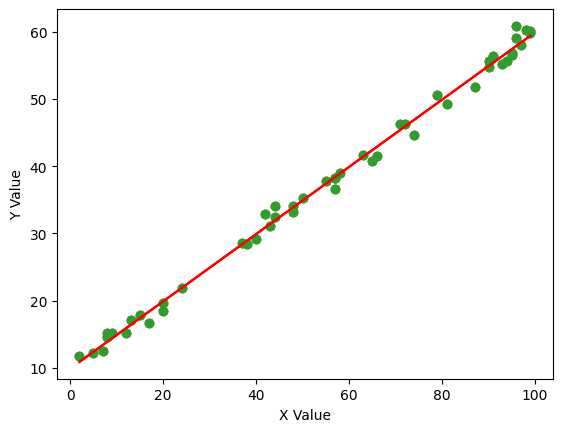

In [5]:
n = 50
X= np.random.randint(0,100,n)
epsilon = np.random.normal(0,1,n)

Y = 10 + 0.5 * X + epsilon

linreg(X,Y)[0];
print(f"Line of best fit: Y = {linreg(X,Y)[1]} + {linreg(X,Y)[2]} *X  ")

<ErrorbarContainer object of 3 artists>

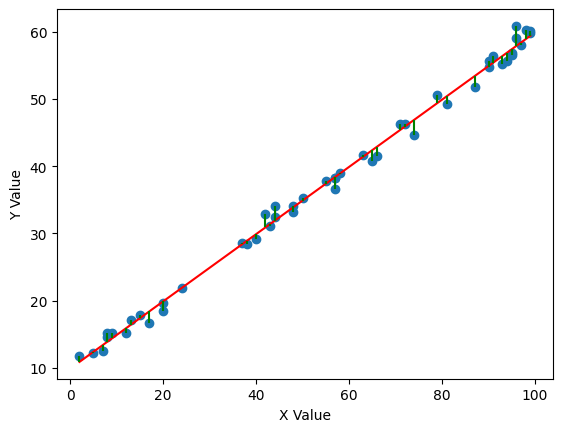

In [14]:
model, B0, B1 = linreg(X,Y)

residuals = model.resid

lower_error = np.maximum(0, residuals)   # 실제값이 예측값보다 클 때 (위로 뻗음)
upper_error = np.maximum(0, -residuals)  # 실제값이 예측값보다 작을 때 (아래로 뻗음)
plt.errorbar(X,Y,xerr = 0, yerr = [lower_error,upper_error],linestyle = "None",color = "Green")

In [10]:
residuals = model.resid
print(residuals)

[ 0.74917909  0.5602497   0.95223273 -0.55447996  0.9394707   1.20616223
  1.2434073  -1.40316687  1.14875227  0.2046941   0.71404577  2.96608268
 -0.47343567  0.48364497  0.31947022  0.4006552  -0.20875479 -0.65044213
 -1.62356174 -0.23481189 -0.67379274 -0.84741133  1.34671521 -0.91511873
 -1.82483199  0.85517922 -0.14232091  0.67292811  0.22558775 -0.73281377
 -1.68595757  0.4938919  -0.05592637 -0.07225061 -1.31980435 -1.2266932
  2.02342526 -0.15244944 -2.18478627 -1.44944209  2.14511702  0.05129689
  0.13888079  0.75323136 -0.14612359  0.81891177 -1.73857884 -1.15088258
  0.35588199 -0.3012568 ]


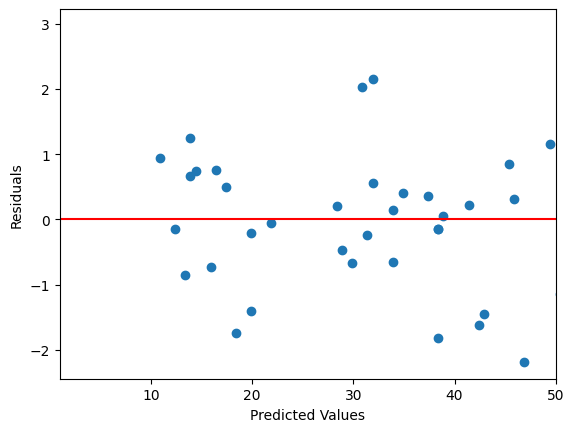

In [15]:
plt.scatter(model.predict(), residuals);
plt.axhline(0, color='red')
plt.xlabel('Predicted Values');
plt.ylabel('Residuals');
plt.xlim([1,50]);

# Appropriateness of a Linear Model


Beta_0: 16.762413950467018
Beta_1: -2.267523719760887


Text(0, 0.5, 'Residuals')

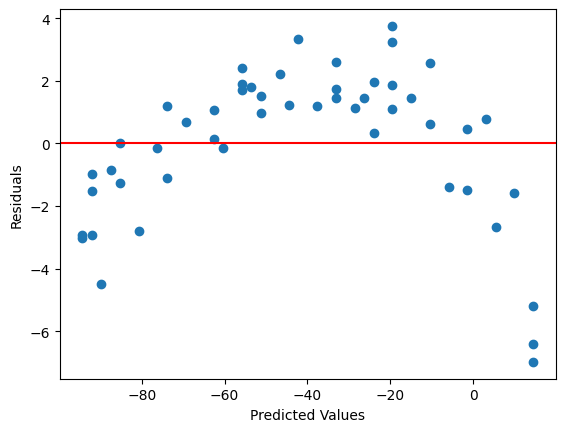

In [16]:
n = 50
X = np.random.randint(0, 50, n)
epsilon = np.random.normal(0, 1, n)
Y_nonlinear = 10 - X**1.2 + epsilon

model = sm.OLS(Y_nonlinear, sm.add_constant(X)).fit()
B0, B1 = model.params
residuals = model.resid

print(f"Beta_0: {B0}")
print(f"Beta_1: {B1}")
plt.scatter(model.predict(),residuals);
plt.axhline(0,color='red')
plt.xlabel('Predicted Values');
plt.ylabel('Residuals')

# Heteroscedasticity

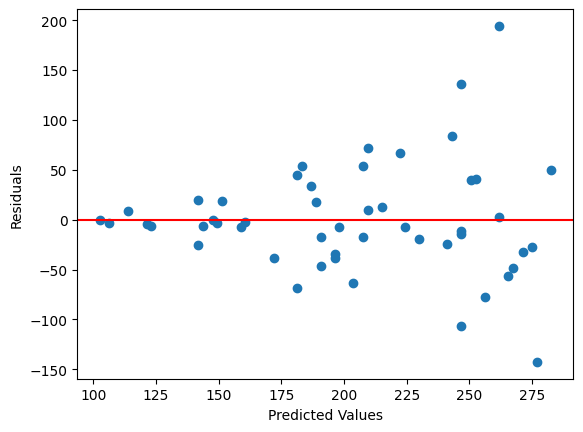

In [17]:
n = 50
X = np.random.randint(0, 100, n)
epsilon = np.random.normal(0, 1, n)
Y_heteroscedastic = 100 + 2*X + epsilon*X

model = sm.OLS(Y_heteroscedastic, sm.add_constant(X)).fit()
B0, B1 = model.params
residuals = model.resid

plt.scatter(model.predict(), residuals);
plt.axhline(0, color='red')
plt.xlabel('Predicted Values');
plt.ylabel('Residuals');

In [20]:
breusch_pagan_p = smd.het_breuschpagan(model.resid, model.model.exog)[1]
print(breusch_pagan_p)
if breusch_pagan_p > 0.05:
    print("The relationship is not heteroscedastic")
if breusch_pagan_p < 0.05:
    print("The relationship is heteroscedastic")

0.006060641342590881
The relationship is heteroscedastic


In [21]:
# Finding first-order differences in Y_heteroscedastic
Y_heteroscedastic_diff = np.diff(Y_heteroscedastic)

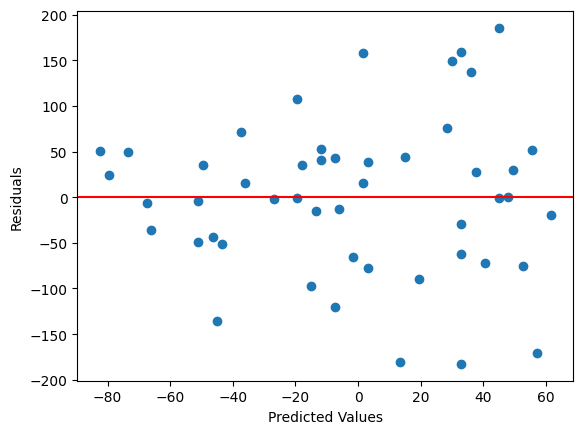

In [22]:
model = sm.OLS(Y_heteroscedastic_diff, sm.add_constant(X[1:])).fit()
B0, B1 = model.params
residuals = model.resid

plt.scatter(model.predict(), residuals);
plt.axhline(0, color='red')
plt.xlabel('Predicted Values');
plt.ylabel('Residuals');

In [25]:
breusch_pagan_p = smd.het_breuschpagan(residuals, model.model.exog)[1]
print(breusch_pagan_p)
if breusch_pagan_p > 0.05:
    print("The relationship is not heteroscedastic.")
if breusch_pagan_p < 0.05:
    print("The relationship is heteroscedastic.")

0.01996643137846541
The relationship is heteroscedastic.


In [26]:
#  Taking the log of the previous data Y_heteroscedastic and saving it in Y_heteroscedastic_log
Y_heteroscedastic_log = np.log(Y_heteroscedastic)

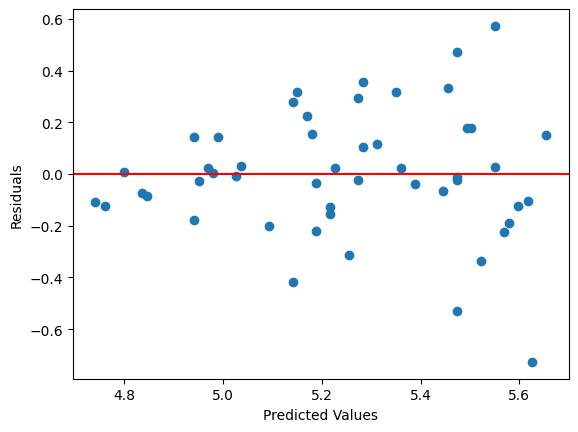

In [27]:
model = sm.OLS(Y_heteroscedastic_log, sm.add_constant(X)).fit()
B0, B1 = model.params
residuals = model.resid

plt.scatter(model.predict(), residuals);
plt.axhline(0, color='red')
plt.xlabel('Predicted Values');
plt.ylabel('Residuals');

In [28]:
# Finding a power transformation adjusted Y_heteroscedastic
Y_heteroscedastic_box_cox = stats.boxcox(Y_heteroscedastic)[0]

# Residuals and Autocorrelation


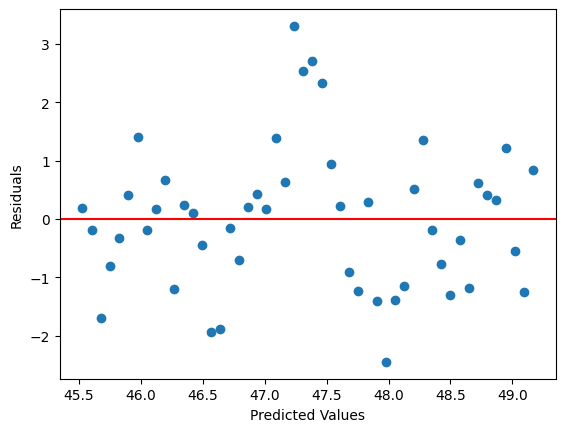

In [29]:
n = 50
X = np.linspace(0, n, n)
Y_autocorrelated = np.zeros(n)
Y_autocorrelated[0] = 50
for t in range(1, n):
    Y_autocorrelated[t] = Y_autocorrelated[t-1] + np.random.normal(0, 1) 

# Regressing X and Y_autocorrelated
model = sm.OLS(Y_autocorrelated, sm.add_constant(X)).fit()
B0, B1 = model.params
residuals = model.resid

plt.scatter(model.predict(), residuals);
plt.axhline(0, color='red')
plt.xlabel('Predicted Values');
plt.ylabel('Residuals');

In [36]:
ljung_box = smd.acorr_ljungbox(residuals, lags = 10)
print(f"Lagrange Multiplier Statistics:{ljung_box['lb_stat']}")
print(f'\nP-values: {ljung_box['lb_pvalue']}\n')


if any(ljung_box['lb_pvalue']<0.05):
    print("The residuals are autocorrelated.")
else:
    print("The residuals are not autocorrelated.")

Lagrange Multiplier Statistics:1     17.690121
2     24.938206
3     27.312639
4     27.355049
5     27.357513
6     28.233028
7     30.797327
8     36.161635
9     47.010466
10    54.330561
Name: lb_stat, dtype: float64

P-values: 1     2.599732e-05
2     3.843593e-06
3     5.062500e-06
4     1.684921e-05
5     4.858800e-05
6     8.492696e-05
7     6.775903e-05
8     1.640319e-05
9     3.907080e-07
10    4.210624e-08
Name: lb_pvalue, dtype: float64

The residuals are autocorrelated.


# Adjusting for Autocorrelation


In [37]:
# Finding first-order differences in Y_autocorrelated
Y_autocorrelated_diff = np.diff(Y_autocorrelated)

P-values:  
1     0.109264
2     0.247149
3     0.389482
4     0.096280
5     0.097556
6     0.151206
7     0.218762
8     0.299075
9     0.177398
10    0.231190
Name: lb_pvalue, dtype: float64
The residuals are not autocorrelated.


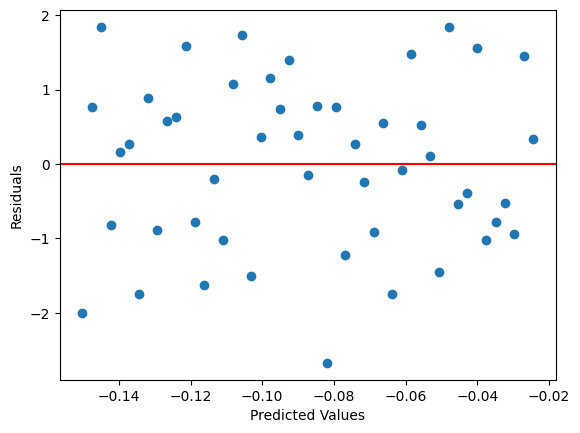

In [39]:
model = sm.OLS(Y_autocorrelated_diff, sm.add_constant(X[1:])).fit()
B0, B1 = model.params
residuals = model.resid

plt.scatter(model.predict(), residuals);
plt.axhline(0, color='red')
plt.xlabel('Predicted Values');
plt.ylabel('Residuals');

# Running and interpreting a Ljung-Box test
ljung_box = smd.acorr_ljungbox(residuals, lags = 10)
print(f"P-values:  \n{ljung_box['lb_pvalue']}")

if any(ljung_box['lb_pvalue'] < 0.05):
    print("The residuals are autocorrelated.")
else:
    print("The residuals are not autocorrelated.")

# Example: Market Beta Calculation


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Esimated TSLA Beta: 1.9541522597463667


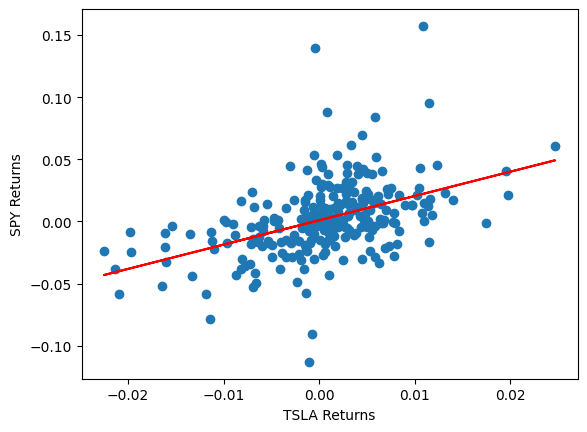

In [ ]:
start = '2014-01-01'
end = '2015-01-01'
asset = yf.download("TSLA",start=start ,end = end)['Close']['TSLA']
benchmark = yf.download("SPY",start = start, end= end)['Close']['SPY']

# We have to take the percent changes to get to returns
# Get rid of the first (0th) element because it is NAN
r_a = asset.pct_change()[1:].values
r_b = benchmark.pct_change()[1:].values # .values로 순수한 숫자 데이터만 담긴 Numpy 배열로 전환

# Regressing the benchmark b and asset a
r_b = sm.add_constant(r_b)

model = sm.OLS(r_a, r_b).fit()
r_b = r_b[:, 1] # 산점도 그릴 때 필요한 1차원 데이터를 위해서 
B0, B1 = model.params

# Plotting the regression
A_hat = (B1*r_b + B0)
plt.scatter(r_b, r_a, alpha=1) # Plot the raw data
plt.plot(r_b, A_hat, 'r', alpha=1);  # Add the regression line, colored in red
plt.xlabel('TSLA Returns')
plt.ylabel('SPY Returns')

print(f"Esimated TSLA Beta: {B1}")

residuals = model.resid

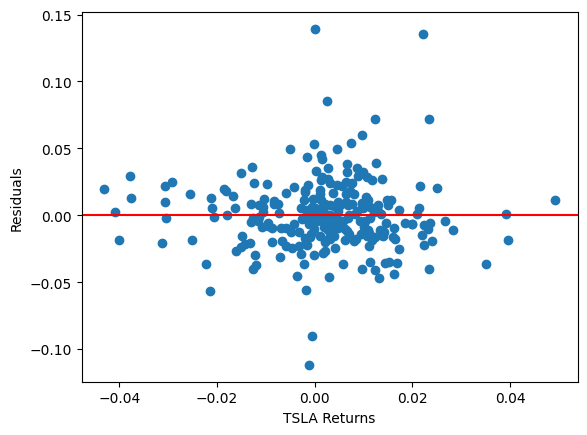

In [51]:
plt.scatter(model.predict(), residuals);
plt.axhline(0, color='red')
plt.xlabel('TSLA Returns');
plt.ylabel('Residuals');

# Breusch-Pagan Heteroscedasticity Test

In [53]:
bp_test = smd.het_breuschpagan(residuals, model.model.exog)

print(f"Lagrange Multiplier Statistic: {bp_test[0]}")
print(f"P-value: {bp_test[1]}")
print(f"f-value: {bp_test[2]}")
print(f"f_p-value: {bp_test[3]}\n")
if bp_test[1] > 0.05:
    print("The relationship is not heteroscedastic.")
if bp_test[1] < 0.05:
    print("The relationship is heteroscedastic.")


Lagrange Multiplier Statistic: 0.8023009594421262
P-value: 0.37040630968832167
f-value: 0.7984603362347596
f_p-value: 0.3724169282800899

The relationship is not heteroscedastic.


# Ljung-Box Autocorrelation Test


In [54]:
# Running and interpreting a Ljung-Box test
ljung_box = smd.acorr_ljungbox(r_a)
print(f"P-values:  \n{ljung_box['lb_pvalue']}")

if any(ljung_box['lb_pvalue'] < 0.05):
    print("The residuals are autocorrelated.")
else:
    print("The residuals are not autocorrelated.")

P-values:  
1     0.900467
2     0.898381
3     0.964942
4     0.964199
5     0.908304
6     0.923251
7     0.960023
8     0.975773
9     0.981898
10    0.986702
Name: lb_pvalue, dtype: float64
The residuals are not autocorrelated.
